In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import scipy
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
uploaded = files.upload()

Saving GlobalLandTemperaturesByMajorCity.csv to GlobalLandTemperaturesByMajorCity.csv


In [ ]:
df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [ ]:
df.shape

(239177, 7)

In [ ]:
df.columns.values

array(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'City', 'Country', 'Latitude', 'Longitude'], dtype=object)

In [ ]:
df.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


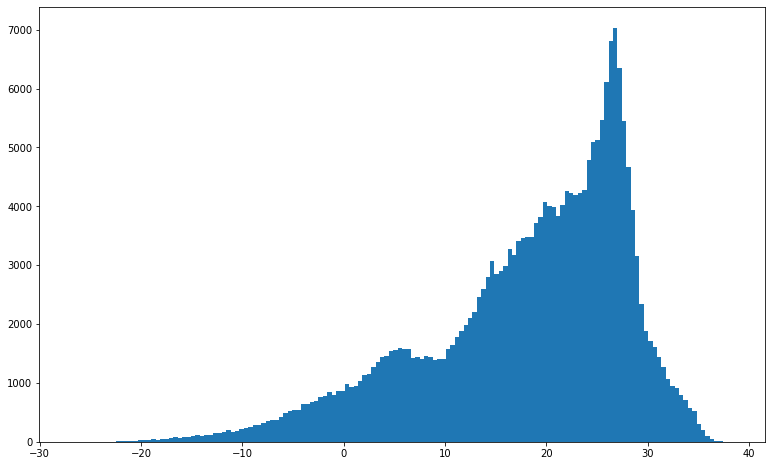

In [ ]:
plt.figure(figsize=(13,8))
plt.hist(df['AverageTemperature'], bins=150)
# plt.scatter(df['Year'],df['AverageTemperature'], s=10, alpha=0.7)
plt.show()

In [ ]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [ ]:
ind_df = df[df['Country']=='India']
ind_df['City'].unique()

array(['Ahmadabad', 'Bangalore', 'Bombay', 'Calcutta', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kanpur', 'Lakhnau', 'Madras', 'Nagpur',
       'New Delhi', 'Pune', 'Surat'], dtype=object)

In [ ]:
city_df = ind_df[ind_df['City']=='Calcutta']
city_df.shape

(2613, 7)

In [ ]:
city_df.isna().sum()

dt                                0
AverageTemperature               81
AverageTemperatureUncertainty    81
City                              0
Country                           0
Latitude                          0
Longitude                         0
dtype: int64

In [ ]:
city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
37270,1796-01-01,18.708,2.305,Calcutta,India,23.31N,88.25E
37271,1796-02-01,21.505,1.717,Calcutta,India,23.31N,88.25E
37272,1796-03-01,25.230,2.404,Calcutta,India,23.31N,88.25E
37273,1796-04-01,29.484,1.902,Calcutta,India,23.31N,88.25E
37274,1796-05-01,30.980,1.656,Calcutta,India,23.31N,88.25E


In [ ]:
city_df['AverageTemperature']=city_df['AverageTemperature'].fillna(method='ffill')
city_df['AverageTemperatureUncertainty']=city_df['AverageTemperatureUncertainty'].fillna(method='ffill')
city_df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

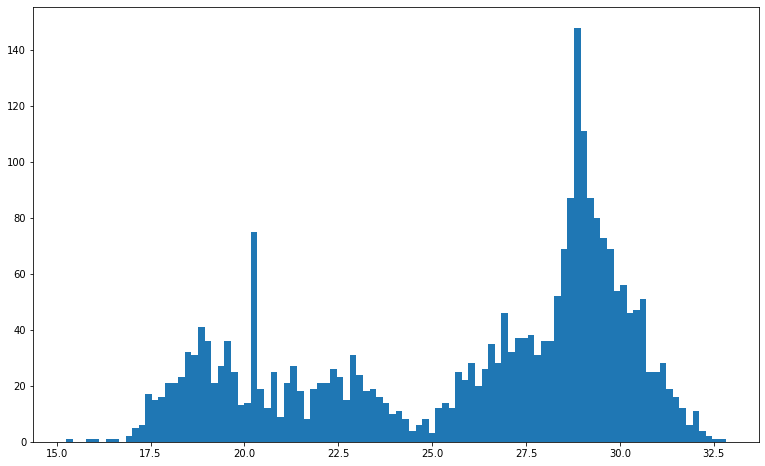

In [ ]:
plt.figure(figsize=(13,8))
plt.hist(city_df['AverageTemperature'], bins=100)
plt.show()

In [ ]:
city_df.reset_index(inplace=True)
city_df.drop(['index'], axis=1, inplace=True)
city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1796-01-01,18.708,2.305,Calcutta,India,23.31N,88.25E
1,1796-02-01,21.505,1.717,Calcutta,India,23.31N,88.25E
2,1796-03-01,25.230,2.404,Calcutta,India,23.31N,88.25E
3,1796-04-01,29.484,1.902,Calcutta,India,23.31N,88.25E
4,1796-05-01,30.980,1.656,Calcutta,India,23.31N,88.25E


In [ ]:
city_df['dt'] = pd.to_datetime(city_df['dt'])
Weekday = []
Day = []
Month = []
Year = []

for i in range(len(city_df)):
  Weekday.append(city_df['dt'].iloc[i].weekday())
  Day.append(city_df['dt'].iloc[i].day)
  Month.append(city_df['dt'].iloc[i].month)
  Year.append(city_df['dt'].iloc[i].year)

city_df['Weekday'] = Weekday
city_df['Day'] = Day
city_df['Month'] = Month
city_df['Year'] = Year

city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Weekday,Day,Month,Year
0,1796-01-01,18.708,2.305,Calcutta,India,23.31N,88.25E,4,1,1,1796
1,1796-02-01,21.505,1.717,Calcutta,India,23.31N,88.25E,0,1,2,1796
2,1796-03-01,25.230,2.404,Calcutta,India,23.31N,88.25E,1,1,3,1796
3,1796-04-01,29.484,1.902,Calcutta,India,23.31N,88.25E,4,1,4,1796
4,1796-05-01,30.980,1.656,Calcutta,India,23.31N,88.25E,6,1,5,1796


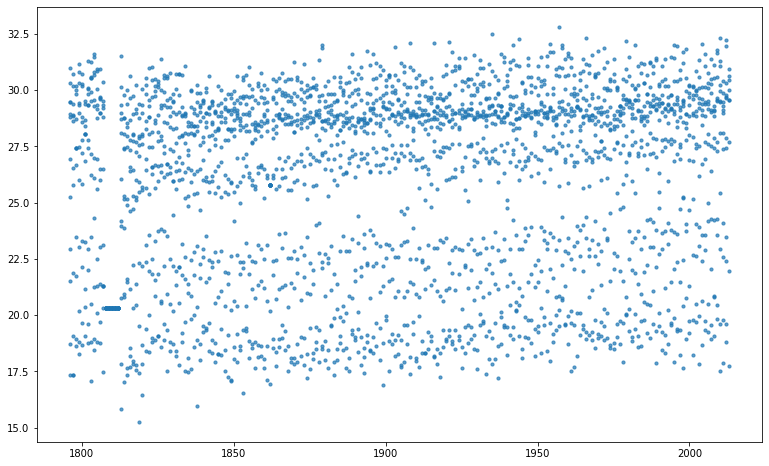

In [ ]:
plt.figure(figsize=(13,8))
plt.scatter(city_df['Year'],city_df['AverageTemperature'], s=10, alpha=0.7)
plt.show()

In [ ]:
cal = city_df[city_df['Year']>=1980]
# temp_2k10 = temp_2k10[temp_2k10['Year']<=2010]

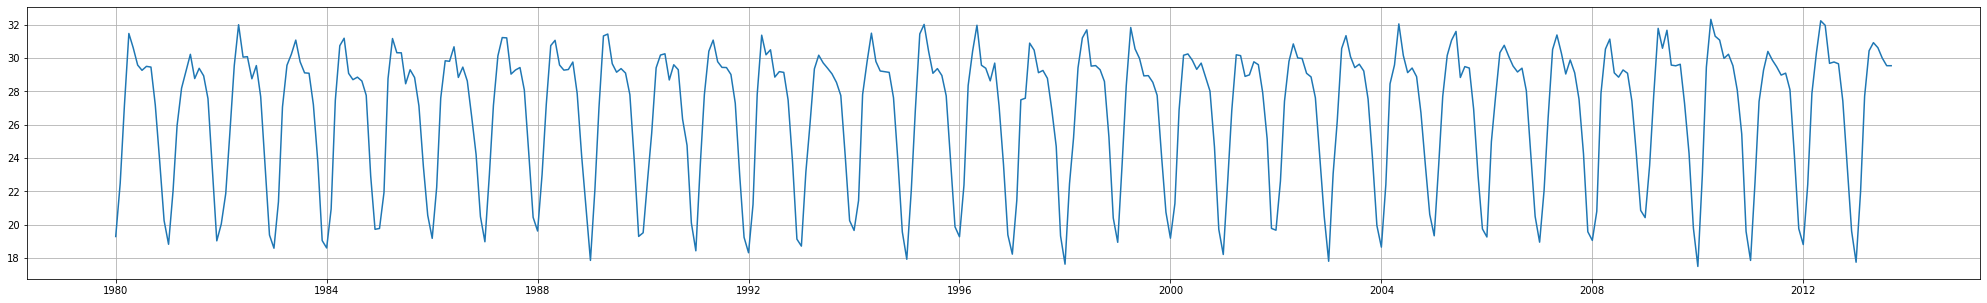

In [ ]:
plt.figure(figsize=(35,5))
plt.plot(cal['dt'], cal['AverageTemperature'])
plt.grid()
plt.show()

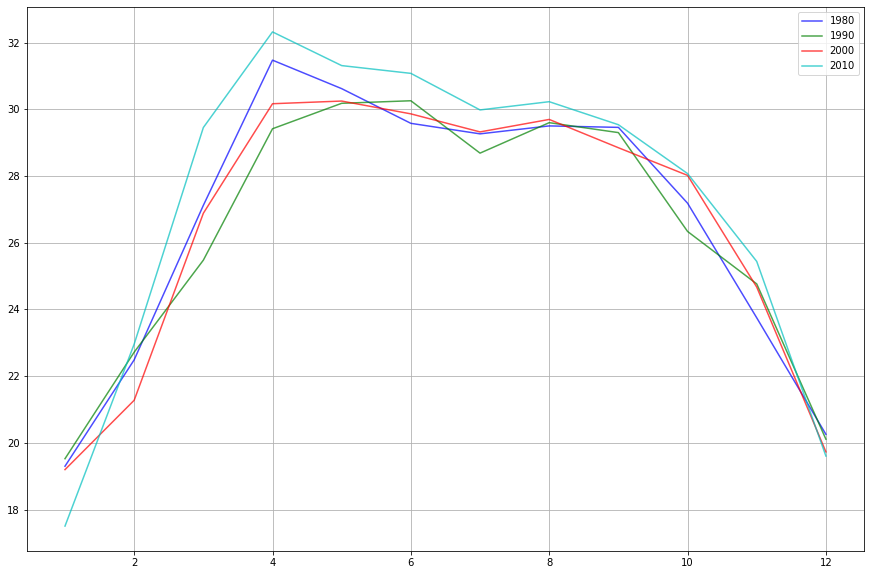

In [ ]:
plt.figure(figsize=(15,10))
ci = ['b', 'g', 'r', 'c', 'm', 'y']
idx = 0
for year in list(cal['Year'].unique())[::10]:
  sdf = cal[cal['Year']==year]
  plt.plot(sdf['Month'], sdf['AverageTemperature'], alpha=0.7, label=str(year), color=ci[idx])
  idx+=1

plt.legend()
plt.grid()
plt.show()

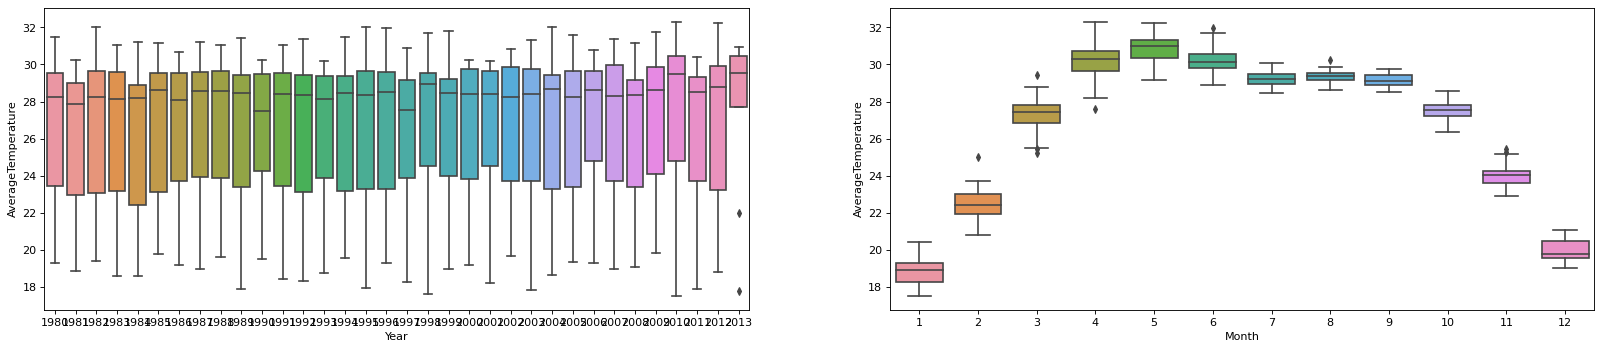

In [ ]:
import seaborn as sns
# short_cal = cal[cal['Year']%10==0]
fig, axes = plt.subplots(1, 2, figsize=(25,5), dpi= 80)
sns.boxplot(x='Year', y='AverageTemperature', data=cal, ax=axes[0])
sns.boxplot(x='Month', y='AverageTemperature', data=cal.loc[~cal.Year.isin([1900, 2020]), :])
plt.show()

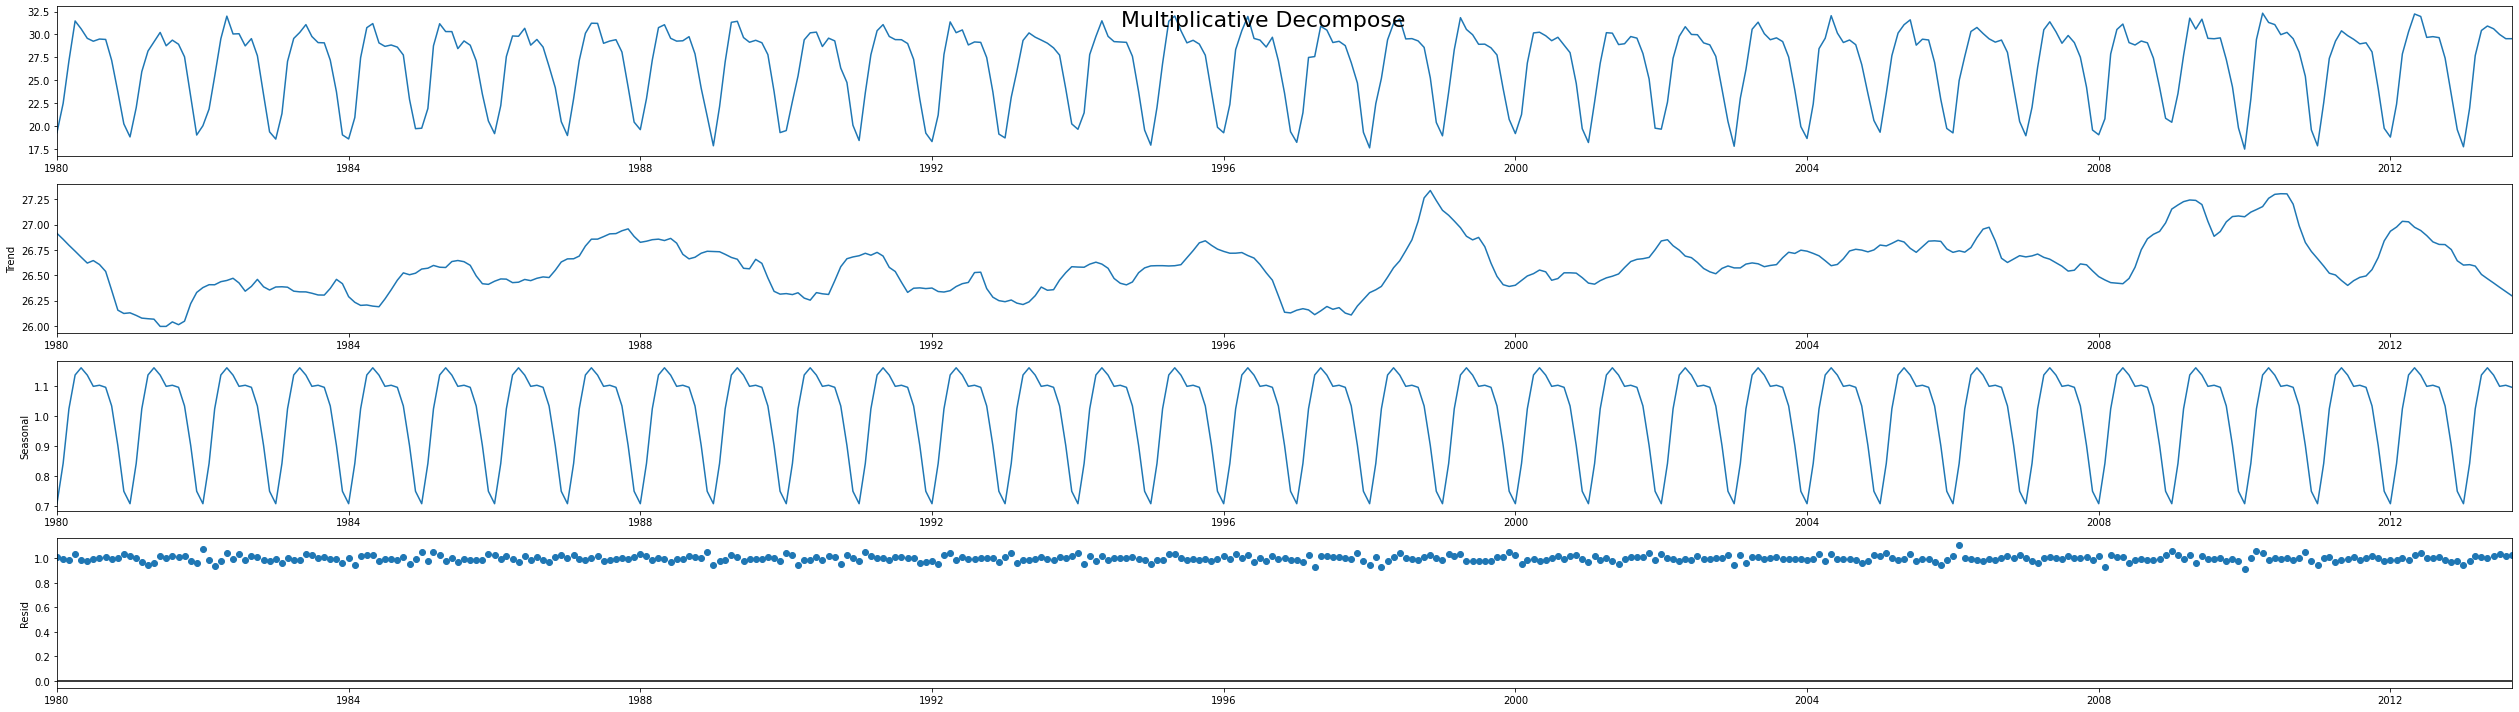

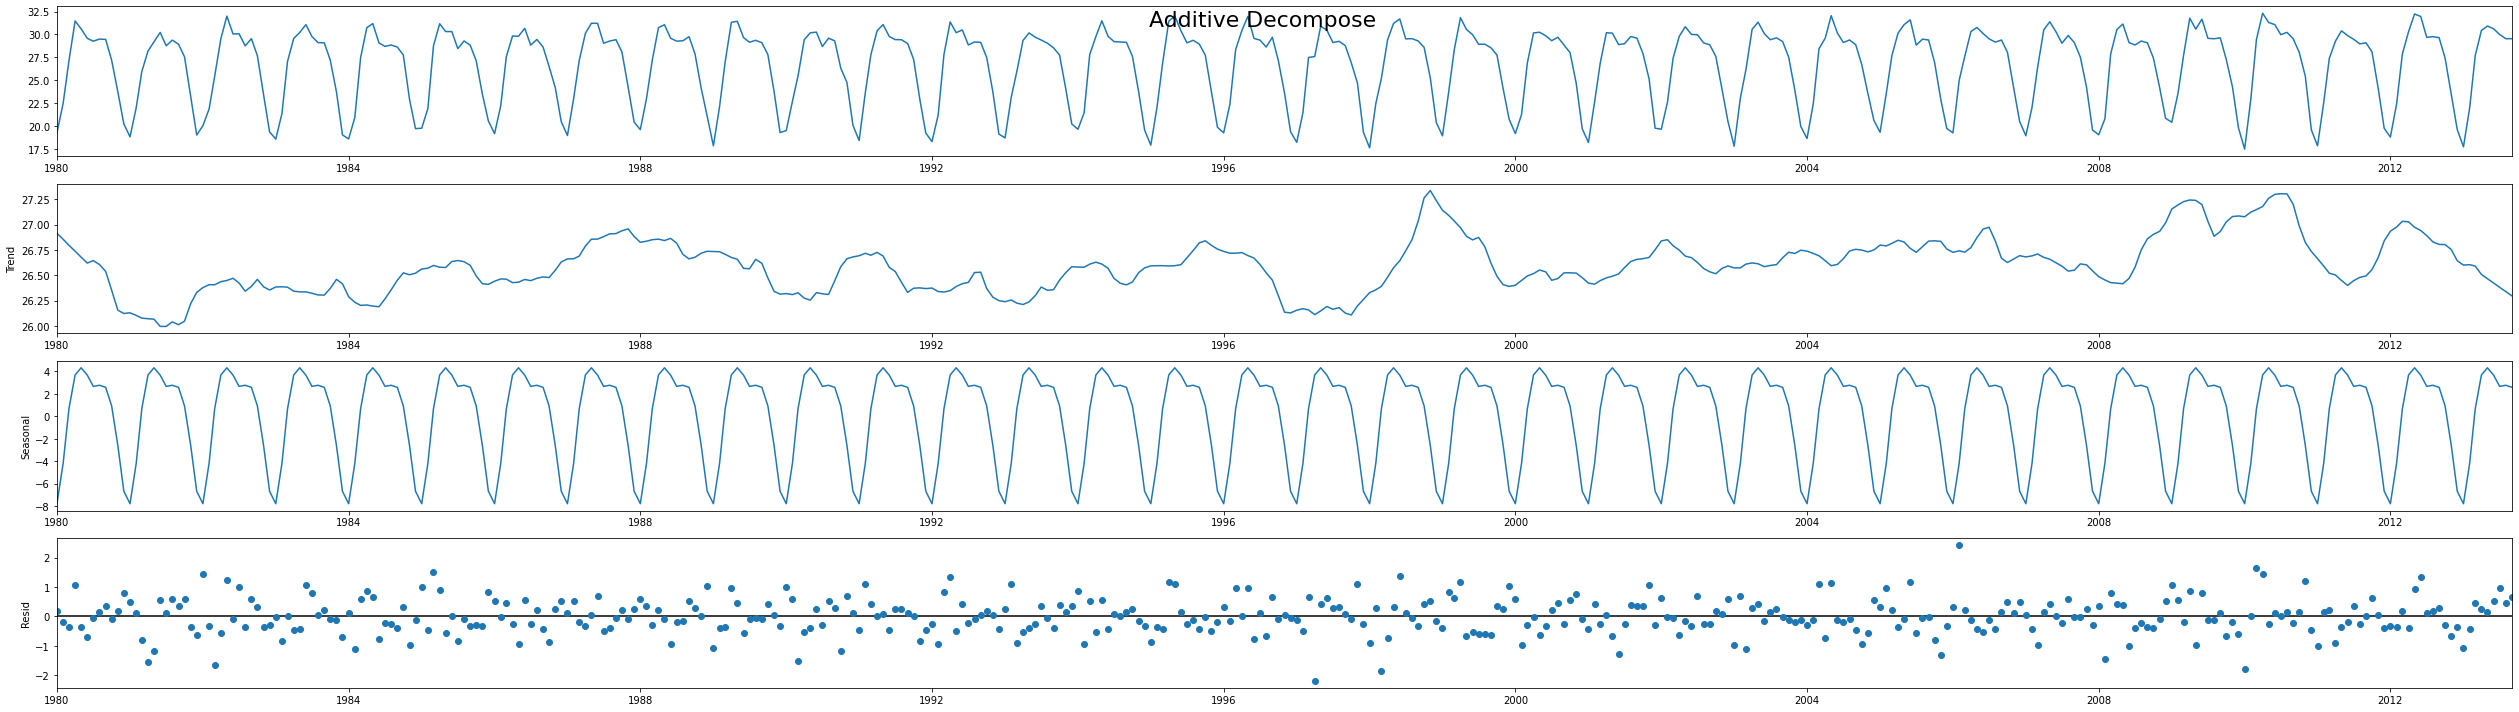

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
cal_df = cal[['dt', 'AverageTemperature']]
cal_df.set_index('dt', inplace=True)
result_mul = seasonal_decompose(cal_df, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(cal_df, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (35,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


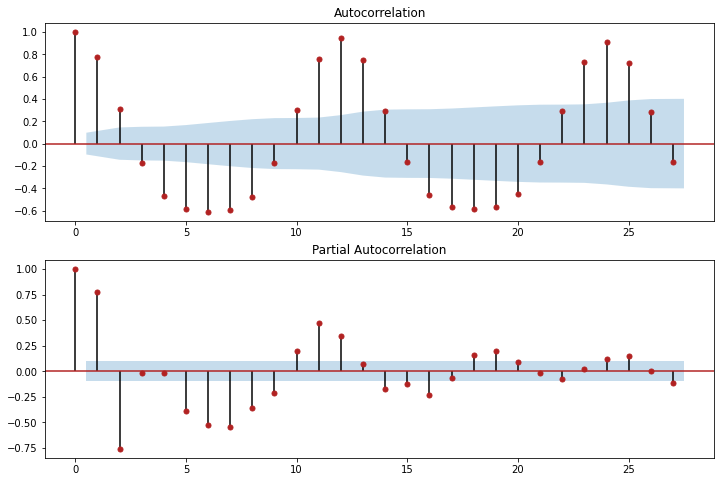

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cal['AverageTemperature'], ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cal['AverageTemperature'], ax=ax2,color='firebrick')

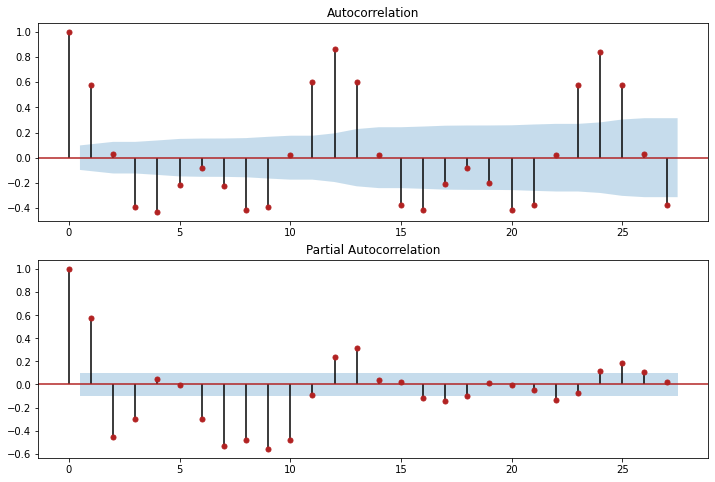

In [ ]:
z_1 = []
for i in range(len(cal)-1):
  z_1.append(cal['AverageTemperature'].iloc[i+1]-cal['AverageTemperature'].iloc[i])

z_1 = pd.Series(z_1)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(z_1, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(z_1, ax=ax2,color='firebrick')

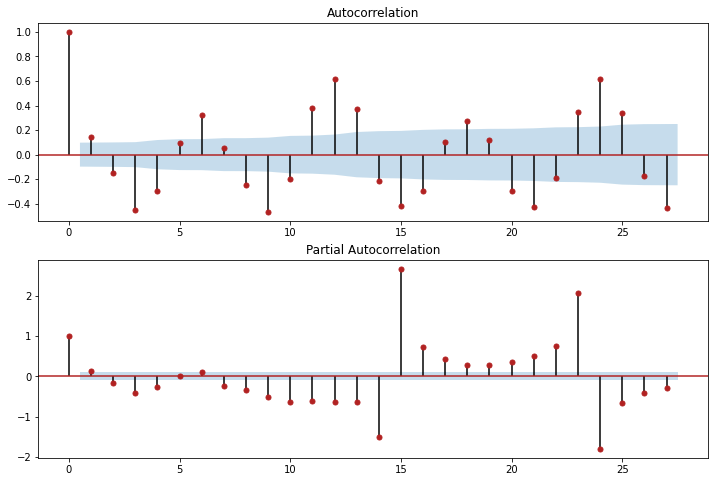

In [ ]:
z_2 = []
for i in range(len(z_1)-1):
  z_2.append(z_1.iloc[i+1]-z_1.iloc[i])

z_2 = pd.Series(z_2)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(z_2, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(z_2, ax=ax2,color='firebrick')

In [ ]:
result = adfuller(city_df['AverageTemperature'])
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -4.612217932478495
p-value: 0.0001226348936026571
Critical Values:
	1%: -3.4328812463201746
	5%: -2.8626583075270813
	10%: -2.5673653156355627


In [ ]:
result = adfuller(cal['AverageTemperature'][:120])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.868041204603813
p-value: 0.347241607139264
Critical Values:
	1%: -3.4924012594942333
	5%: -2.8886968193364835
	10%: -2.5812552709190673


In [ ]:
result = adfuller(z_1)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -10.887157510090042
p-value: 1.2515511309226615e-19
Critical Values:
	1%: -3.4471856790801514
	5%: -2.868960436182993
	10%: -2.5707229006220524


In [ ]:
result = adfuller(z_2)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -10.759992017561416
p-value: 2.5352457547475126e-19
Critical Values:
	1%: -3.4474946672686824
	5%: -2.8690962436986855
	10%: -2.570795299750434


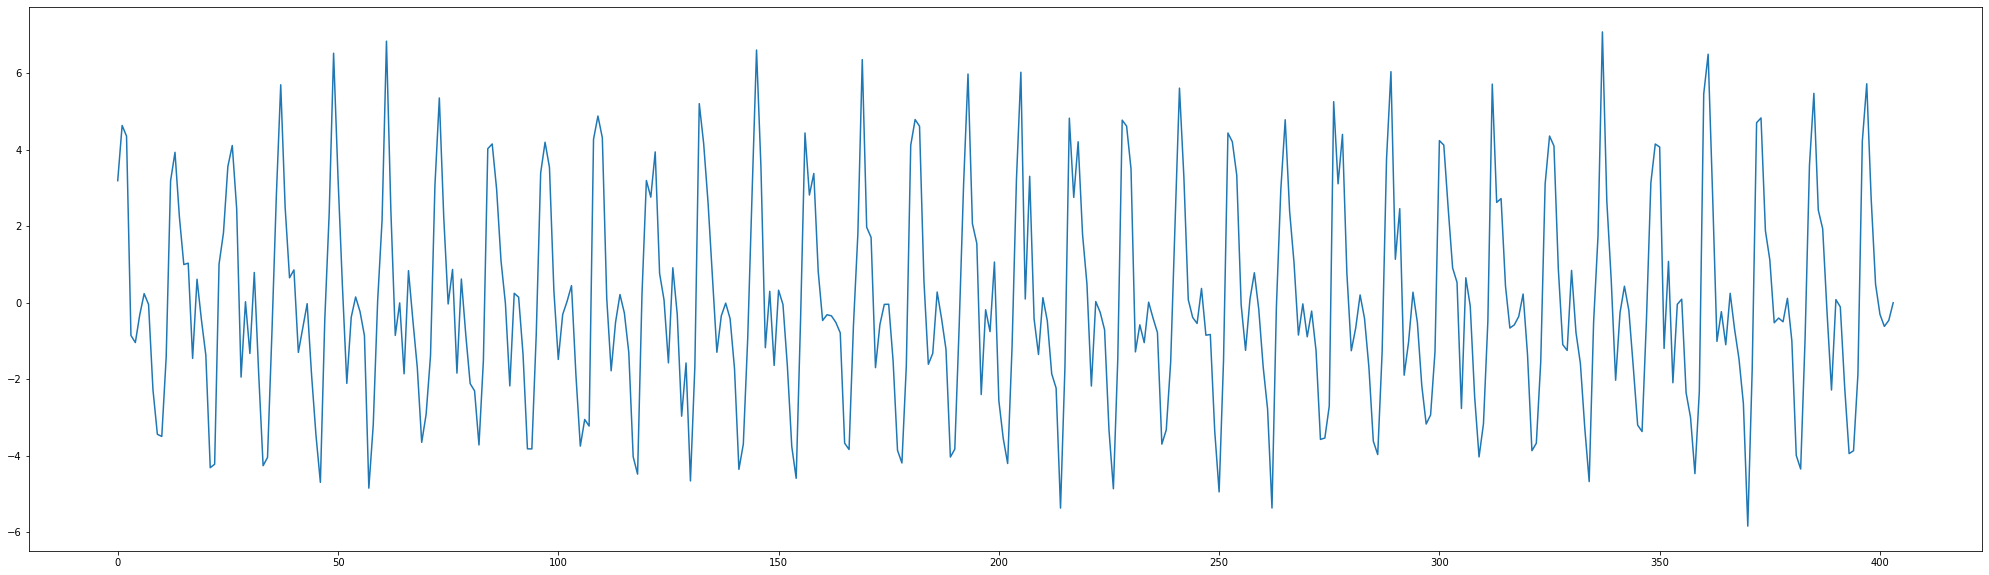

In [ ]:
plt.plot(z_1)

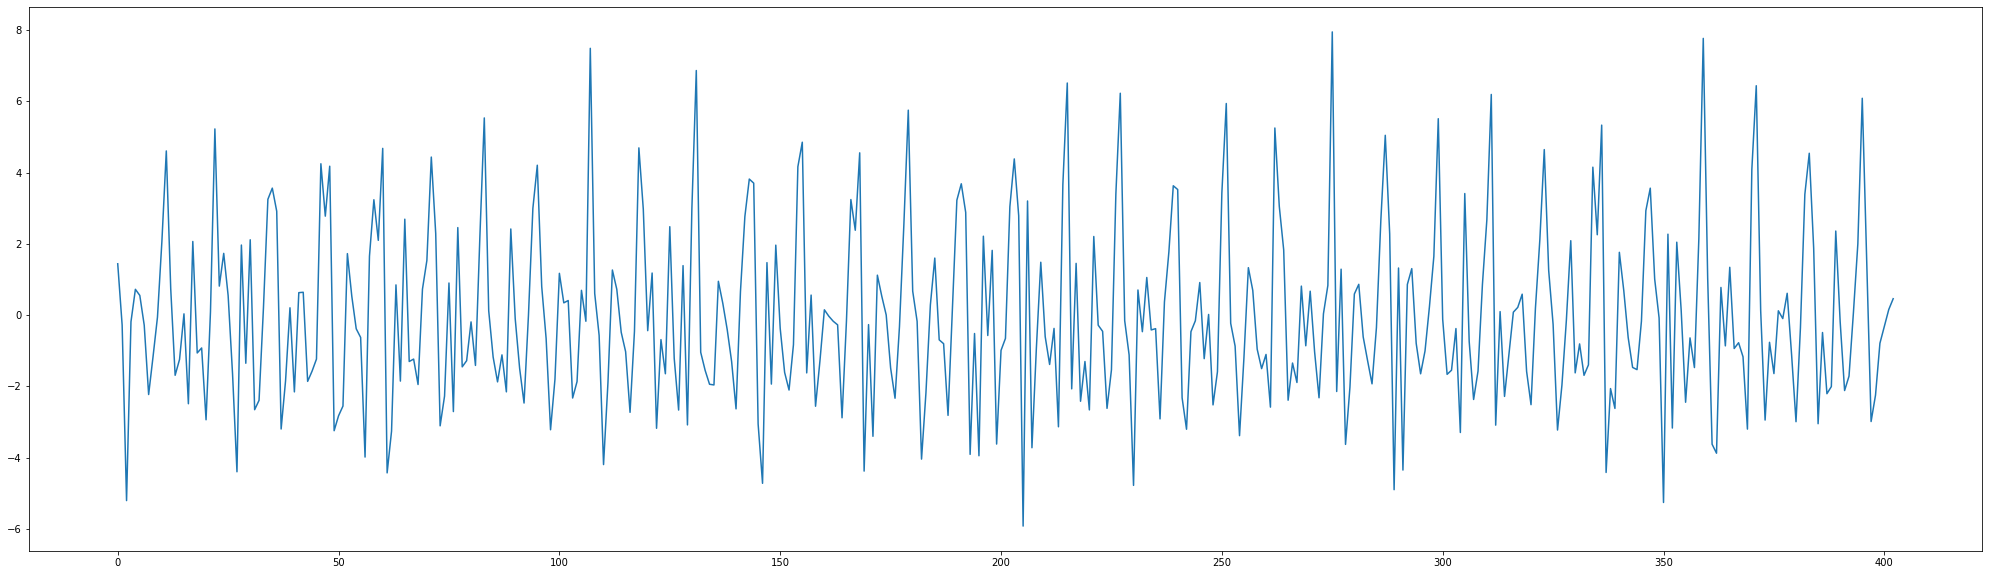

In [ ]:
plt.plot(z_2)

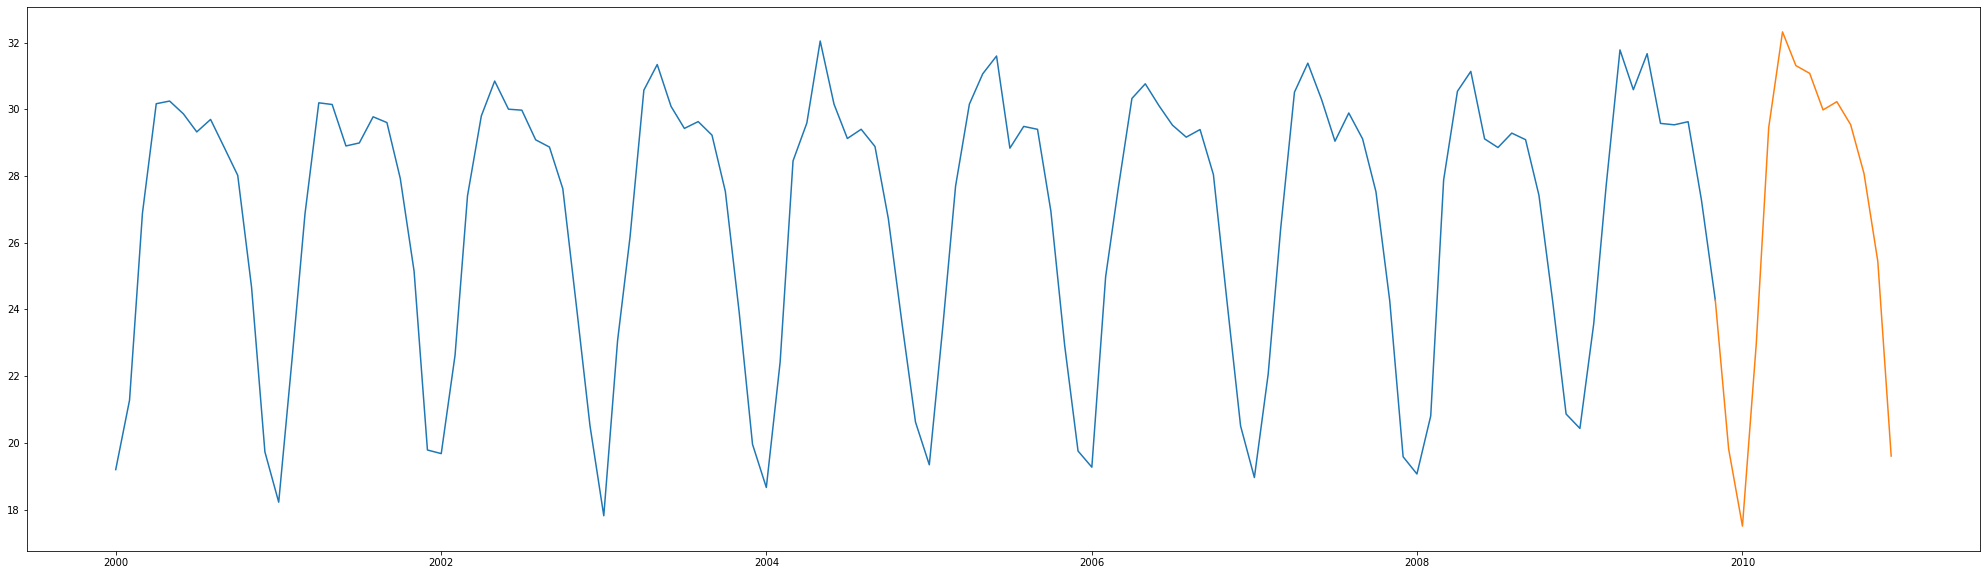

In [ ]:
for_pred = cal[cal['Year']>=2000]
for_pred = for_pred[for_pred['Year']<=2010]
ts = round(0.9*len(for_pred))
train = for_pred[:ts]
test = for_pred[ts-1:]
train = train[['dt', 'AverageTemperature']]
test = test[['dt', 'AverageTemperature']]
train.set_index('dt', inplace=True)
test.set_index('dt', inplace=True)
plt.plot(train)
plt.plot(test)

In [ ]:
for ar in range(1,10):
  for ma in range(1,10):
    try:
      model = ARIMA(train, order=(ar,1,ma))
      model_fit = model.fit()
      print((ar, ma), model_fit.aic)
    except:
      continue
    # print(model_fit.summary())
    

(1, 2) 516.7652722177457
(1, 7) 454.96620154609116
(1, 8) 444.422957191152
(2, 5) 438.38823912383475
(2, 6) 421.77194857584493
(3, 2) 476.42682958686385
(7, 2) 333.308126537053
(7, 3) 313.55348298412025
(8, 1) 338.9606469867217
(8, 2) 313.9596449619615
(8, 3) 308.28722065617455
(8, 4) 312.89410268609265
(8, 7) 320.5069359923183
(9, 1) 324.27262277782495
(9, 2) 310.09121025768854
(9, 3) 306.9901800827044
(9, 4) 311.15486849359655
(9, 5) 304.49492397810604
(9, 6) 334.490422922881
(9, 7) 304.8746247028878


In [ ]:
model = ARIMA(train, order=(9,1,5))
model_fit = model.fit()
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.AverageTemperature   No. Observations:                  118
Model:                   ARIMA(9, 1, 5)   Log Likelihood                -136.247
Method:                         css-mle   S.D. of innovations              0.700
Date:                  Mon, 28 Nov 2022   AIC                            304.495
Time:                          23:14:29   BIC                            348.826
Sample:                      02-01-2000   HQIC                           322.495
                           - 11-01-2009                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0074      0.010      0.759      0.448      -0.012       0.026
ar.L1.D.AverageTemperature     0.7449      0.047     15.973      0.

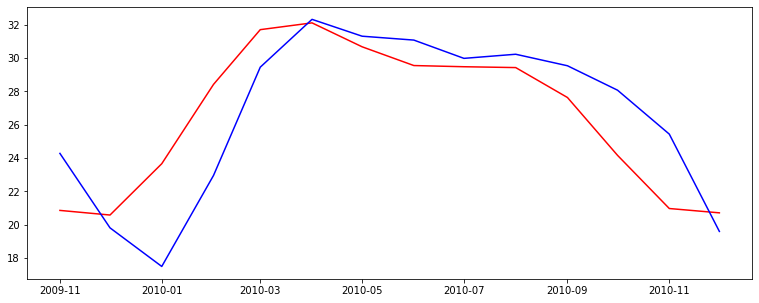

In [ ]:
plt.figure(figsize=(13,5))
fc, se, conf = model_fit.forecast(len(test), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test.index)
plt.plot(fc_series, color='red')
plt.plot(test, color='blue')

In [ ]:
# plt.figure(figsize=(15,8))
# n = round(0.90*len(temp_2k10))
# train = temp_2k10[:n]
# test = temp_2k10[n-1:]
# plt.plot(train['dt'], train['AverageTemperature'], color='blue', label='train')
# plt.plot(test['dt'], test['AverageTemperature'], color='red', label='test')
# plt.grid()
# plt.legend()
# plt.show()

temp = temp_2k10
N = len(temp.AverageTemperature)
split = 0.95
training_size = round(split*N)
test_size = round((1-split)*N)
series = temp.AverageTemperature[:training_size]
date = temp.dt[:training_size]
test_series = temp.AverageTemperature[len(date)-1:len(temp)]
test_date = temp.dt[len(date)-1:len(temp)]

In [ ]:
from itertools import product
from tqdm import tqdm_notebook

In [ ]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
          model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
           continue
            
        aic = model.aic
        results.append([order, model.aic])
    #print(results)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = series)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
ps = range(0, 10, 1)
d = 2
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_2 = optimize_ARIMA(order_list, exog = series)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
final = result_d_0.append(result_d_1)
final = final.append(result_d_2)
best_models = final.sort_values(by='AIC', ascending=True).reset_index(drop=True).head()

In [ ]:
best_models

,"(p, d, q)",AIC
0,"(4, 1, 5)",20.000000
1,"(5, 1, 6)",322.595891
2,"(6, 1, 7)",322.767756
3,"(7, 1, 7)",324.926142
4,"(9, 1, 9)",325.178109


In [ ]:
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_0 = SARIMAX(series, order=best_model_params_0).fit()
print(best_model_0.summary())

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  125
Model:               SARIMAX(4, 1, 5)   Log Likelihood                   0.000
Date:                Sat, 26 Nov 2022   AIC                             20.000
Time:                        16:03:51   BIC                             48.203
Sample:                             0   HQIC                            31.457
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0612    1.5e-07   1.37e+07      0.000       2.061       2.061
ar.L2         -2.1224   1.59e-07  -1.34e+07      0.000      -2.122      -2.122
ar.L3          2.0612   1.59e-07   1.29e+07      0.0

In [ ]:
fore_l= test_size-1
forecast = best_model_0.get_prediction(start=training_size, end=training_size+fore_l)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.05)

In [ ]:
error_test=city_df.loc[test_date[1:].index.tolist()].AverageTemperatureUncertainty
index_test = test_date[1:].index.tolist()
test_set = test_series[1:]

In [ ]:
lower_test = test_set-error_test
upper_test = test_set+error_test

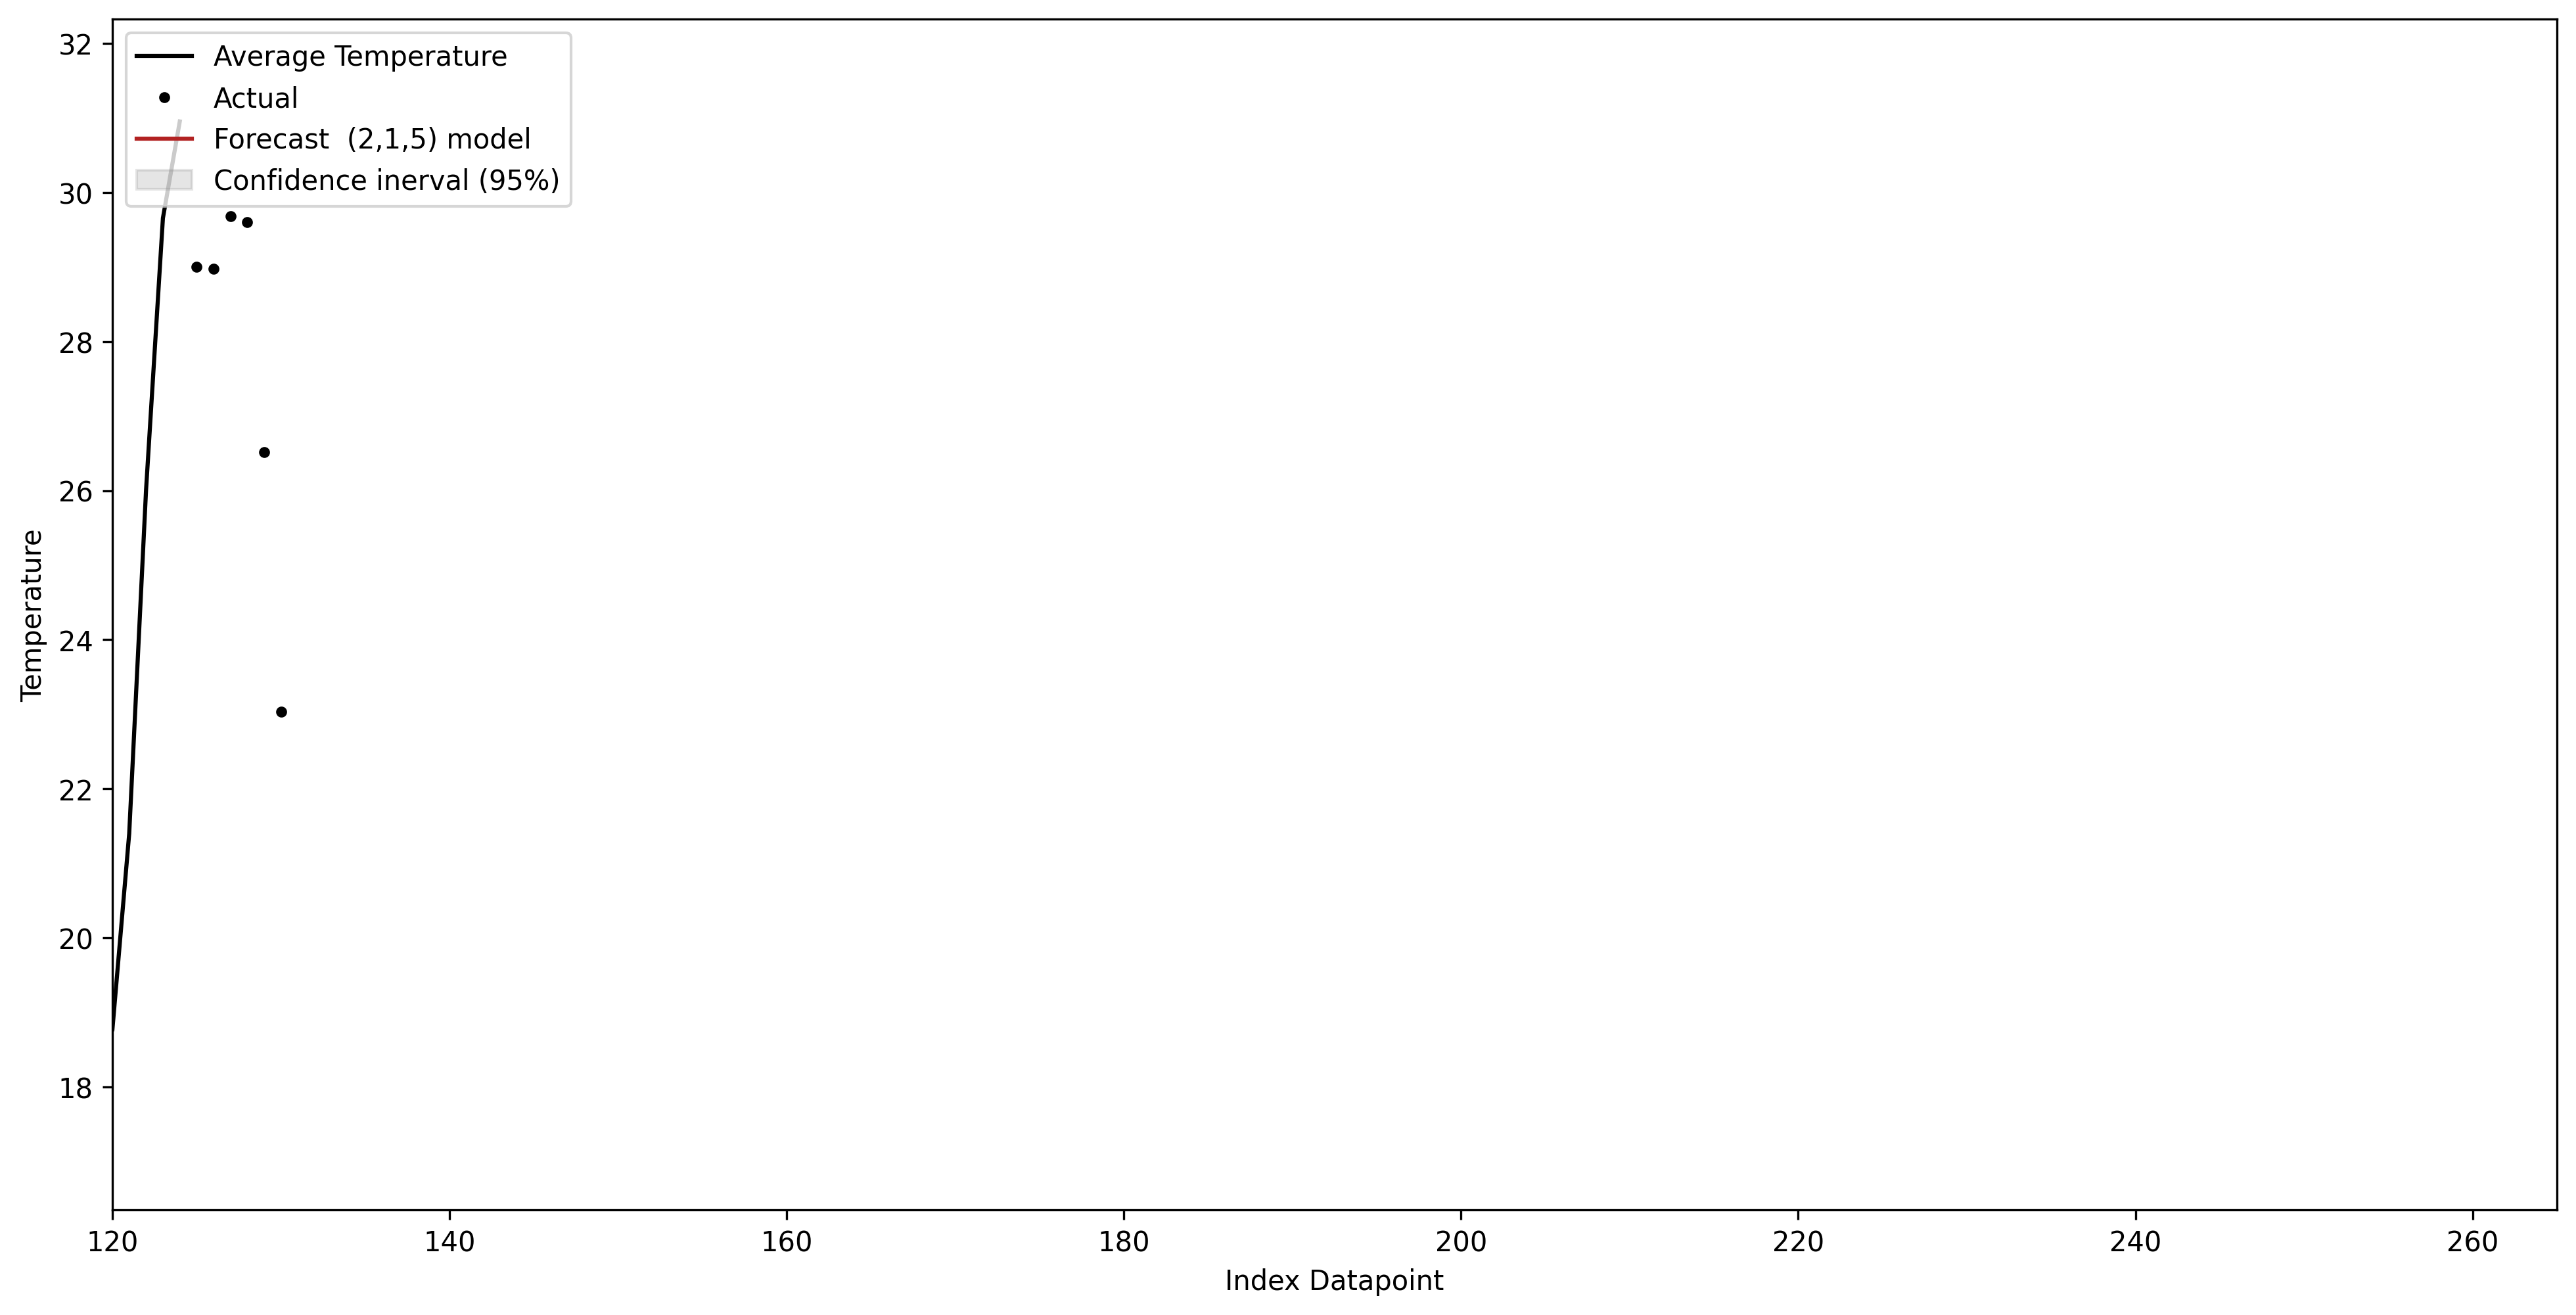

In [ ]:
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x0 = city_df.AverageTemperature.index[0:training_size]
x1=city_df.AverageTemperature.index[training_size:training_size+fore_l+1]
#ax.fill_between(forec, ci['lower Load'], ci['upper Load'])
plt.plot(x0, city_df.AverageTemperature[0:training_size],'k', label = 'Average Temperature')

plt.plot(city_df.AverageTemperature[training_size:training_size+fore_l], '.k', label = 'Actual')

#forec = pd.DataFrame(forec, columns=['f'], index = x1)
#forec.f.plot(ax=ax,color = 'Darkorange',label = 'Forecast (d = 2)')
#ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')

forec = pd.DataFrame(test_series, columns=['f'], index = x1)
forec.f.plot(ax=ax,color = 'firebrick',label = 'Forecast  (2,1,5) model')
ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')


plt.legend(loc = 'upper left')
plt.xlim(120,265)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()